## Explore, segment and cluster the neighborhoods in the city of Toronto

- A Wikipedia page exists with all the information we need to explore and cluster the neighborhoods in Toronto. 
- Webscrapping is performed to obtain the postal code and neighborhood information of Toronto.
- Once the data is structured, request are made to Fourspace API to obtain venue information in the region.
- Neighborhoods are clustered together using K-means according to venue categories in the neighbourhood as features.
- A map is generated to display the visualisation of neighborhood clusters.


This notebook is for __IBM Data Science Capstone Project__

In [1]:
import pandas as pd
import numpy as np

url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

df = pd.read_html(url)
df = df[0]
df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


#### Drop cells that have Not assigned Borough:

In [2]:
df.drop(df[df['Borough']=='Not assigned'].index,axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

#### Check for duplicate Postal Code:

In [3]:
all(df['Postal Code'].value_counts() == 1)

True

Since frequency of all unique values is 1, there are no duplicate Postal Codes.

#### Check for Not assigned neighborhood

In [4]:
any(df['Neighborhood'].isnull().values)

False

In [5]:
any(df['Neighborhood'] == 'Not assigned')

False

There are no cells with Not assigned or null values

####  Number of rows and columns in data frame

In [6]:
df.shape

(103, 3)

#### Get latitude and longitude

In [7]:
df_geo = pd.read_csv('Geospatial_Coordinates.csv') 
final_df = pd.merge(df, df_geo, how='left', on='Postal Code')
final_df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [8]:
final_df[final_df.isnull().any(axis=1)]

,Postal Code,Borough,Neighborhood,Latitude,Longitude


No row entries with null latitude and longitude values

#### Extract out Toronto data

In [9]:
import re
toronto_df = final_df[final_df['Borough'].str.contains('toronto',flags=re.IGNORECASE, regex=True)]
toronto_df.reset_index(drop=True,inplace=True)
toronto_df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


#### Setup venue request to Fourspace

In [10]:
import requests
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
CLIENT_ID = 'DNO35KRVOOLDRVW2M3SSEALEVFWOW4RZ3Z1M4Y5XOA5S5EDX' # your Foursquare ID
CLIENT_SECRET = '42FZ3ZJ1A2XAUGN0PT124LPL1XKX2FEIWFGNTQWEG0CTLMHX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

toronto_venues = getNearbyVenues(names=toronto_df['Neighborhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [12]:
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.654260,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,"Regent Park, Harbourfront",43.654260,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,"Regent Park, Harbourfront",43.654260,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
5,"Regent Park, Harbourfront",43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
6,"Regent Park, Harbourfront",43.654260,-79.360636,Corktown Common,43.655618,-79.356211,Park
7,"Regent Park, Harbourfront",43.654260,-79.360636,The Extension Room,43.653313,-79.359725,Gym / Fitness Center
8,"Regent Park, Harbourfront",43.654260,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site
9,"Regent Park, Harbourfront",43.654260,-79.360636,Figs Breakfast & Lunch,43.655675,-79.364503,Breakfast Spot


In [13]:
toronto_categories = pd.get_dummies(toronto_venues['Venue Category'])

#### Perform K means clustering

In [14]:
from sklearn.cluster import KMeans

kclusters = range(1,21)
sum_sq_err = []

for k in kclusters:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(toronto_categories)
    centroids = kmeans.cluster_centers_
    sum_sq_err.append(kmeans.inertia_)     #    Sum of squared distances of samples to their closest cluster center.

sum_sq_err

[1584.665841584159,
 1453.3270013568526,
 1423.5207756232694,
 1311.618401206637,
 1281.979938271605,
 1249.47585114806,
 1224.9919224555738,
 1203.3223684210527,
 1173.2900505902198,
 1134.3560209424083,
 1109.6003568242638,
 1094.4068716094032,
 1071.1404805914972,
 1040.5784966698382,
 1039.2038095238097,
 1010.6013712047013,
 989.9839999999999,
 945.9958115183246,
 945.7361256544503,
 904.659364731654]

#### Find best K

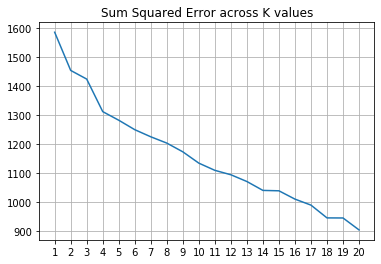

In [20]:
import matplotlib.pyplot as plt

plt.plot(kclusters,sum_sq_err)
plt.xticks(kclusters)
plt.grid()
plt.title('Sum Squared Error across K values')

plt.show()

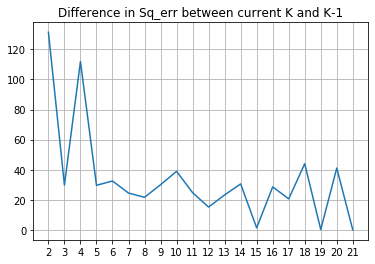

In [16]:
temp = sum_sq_err[1:]
temp.append(sum_sq_err[-1])

d = []
for x,y in zip(sum_sq_err,temp):
    d.append(x-y)
    
plt.plot(range(2,22),d)
plt.xticks(np.arange(2,22,step=1))
plt.title('Difference in Sq_err between current K and K-1')
plt.grid()

plt.show()

As we can see from the plots, suitable cluster size are K = 2 or 4. We'll select K = 4 to encompass more segmentation of the cluster in Toronto

#### Generate map visualisation

In [17]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(toronto_categories)

In [18]:
cluster_labels = pd.DataFrame({'Cluster ID':kmeans.labels_})
df_toronto = pd.concat([toronto_venues,cluster_labels],axis =1)

In [21]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

latitude = 43.65
longitude = -79.38
k = 4

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_toronto['Neighborhood Latitude'], df_toronto['Neighborhood Longitude'], df_toronto['Neighborhood'], df_toronto['Cluster ID']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters